# Importing the Libraries

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error

# Load the California Housing Dataset

In [176]:
california_housing = fetch_california_housing()

# Extract features and target variable

In [177]:
X = california_housing.data
y = california_housing.target

# Scale the features between 0 and 1

In [178]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape the input data to fit the LSTM model requirements

In [180]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model

In [181]:
model = Sequential()
model.add(LSTM(units=256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=64))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='relu'))

# Compile the model

In [182]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Define the learning rate schedule

In [183]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model

In [184]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, callbacks=[lr_scheduler])

Epoch 1/200
413/413 [==============================] - 7s 10ms/step - loss: 0.6899 - val_loss: 0.6162 - lr: 0.0100
Epoch 2/200
413/413 [==============================] - 3s 8ms/step - loss: 0.5211 - val_loss: 0.4811 - lr: 0.0100
Epoch 3/200
413/413 [==============================] - 3s 8ms/step - loss: 0.4954 - val_loss: 0.4884 - lr: 0.0100
Epoch 4/200
413/413 [==============================] - 3s 8ms/step - loss: 0.4906 - val_loss: 0.4916 - lr: 0.0100
Epoch 5/200
413/413 [==============================] - 3s 8ms/step - loss: 0.4748 - val_loss: 0.4546 - lr: 0.0100
Epoch 6/200
413/413 [==============================] - 3s 8ms/step - loss: 0.4599 - val_loss: 0.4699 - lr: 0.0100
Epoch 7/200
413/413 [==============================] - 3s 8ms/step - loss: 0.4620 - val_loss: 0.4729 - lr: 0.0100
Epoch 8/200
413/413 [==============================] - 4s 9ms/step - loss: 0.4495 - val_loss: 0.4441 - lr: 0.0100
Epoch 9/200
413/413 [==============================] - 4s 9ms/step - loss: 0.4481 - val

# Evaluate the model on the test data

In [185]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

129/129 [==============================] - 1s 3ms/step
Mean Squared Error: 0.26386804836462685


# Plot training and validation loss

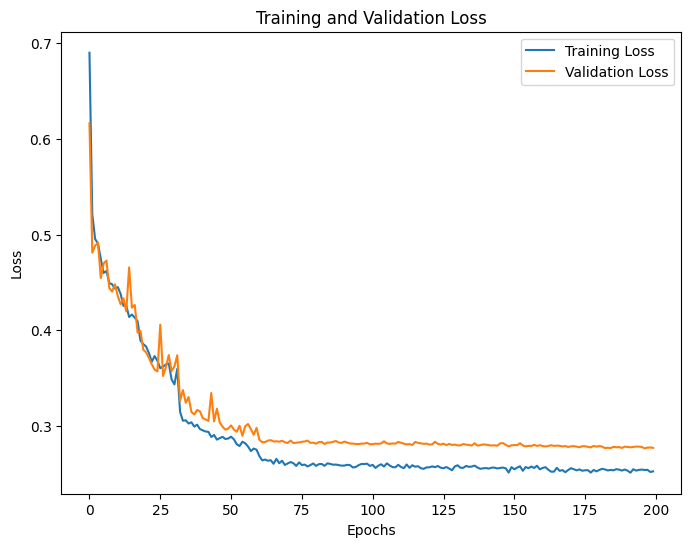

In [186]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot actual vs predicted values

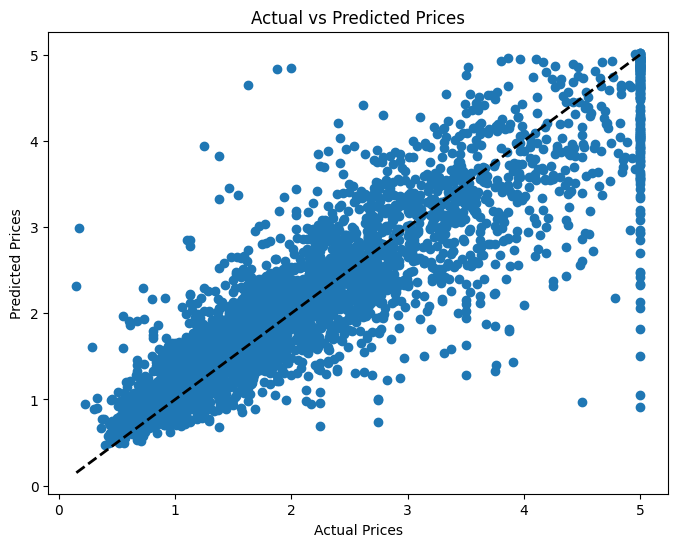

In [187]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Select 5 random indices from the test set

In [206]:
random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)

# Get the corresponding samples and actual house prices


In [207]:
X_samples = X_test[random_indices]
y_actual = y_test[random_indices]

# Predict the house prices

In [208]:
y_pred = model.predict(X_samples)

1/1 [==============================] - 0s 22ms/step


# Print the predicted and actual house prices

In [209]:
for i in range(5):
    print("Sample", i+1)
    print("Predicted:", y_pred[i][0])
    print("Actual:", y_actual[i])
    print()

Sample 1
Predicted: 1.7294087
Actual: 1.628

Sample 2
Predicted: 1.4543478
Actual: 1.688

Sample 3
Predicted: 1.8915094
Actual: 1.74

Sample 4
Predicted: 2.6827521
Actual: 2.65

Sample 5
Predicted: 1.2191783
Actual: 1.875

